# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [17]:
import pandas as pd
import numpy as np
# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [18]:
# TODO
dtype = ({
'id_realEstates': 'int64',
'isNew': bool,
'realEstate_name': object,
'phone_realEstate':    'float64',
'url_inmueble': object,
'rooms':  'float64',
'bathrooms': 'float64',
'surface': 'float64',
'price': 'int64',
'date': object,
'description': object,
'address':  object,
'country': object,
'level1': object,
'level2': object,
'level3': object,
'level4': object,
'level5': object,
'level6': object,
'level7': object,
'level8': object,
'upperLevel': object,
'countryId': object,
'level1Id': 'int64',
'level2Id': 'int64',
'level3Id': 'int64',
'level4Id': 'int64',
'level5Id': 'int64',
'level6Id': 'int64',
'level7Id': 'int64',
'level8Id': 'int64',
'accuracy': 'int64',
'latitude': object,
'longitude': object,
'zipCode': object,
'customZone': 'float64',
})
df = pd.read_csv('assets/real_estate.csv', sep= ';', decimal='.', dtype=dtype)
propiedad_max = df.loc[df['price'].idxmax()]
calle_max = propiedad_max['address']
surface_max = propiedad_max['surface']
print(f" La casa con dirección en Calle {propiedad_max['address']},№ {propiedad_max['surface']} es la más cara y su precio es de {propiedad_max['price']:.0f} USD")

 La casa con dirección en Calle El Escorial,№ nan es la más cara y su precio es de 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [19]:
# TODO
df = pd.read_csv('assets/real_estate.csv', sep= ';')
propiedad_min = df.loc[df['price'].idxmin()]
calle_max = propiedad_min['address']
surface_max = propiedad_min['surface']
print(f" La casa con dirección en Calle {propiedad_min['address']},№ {propiedad_min['surface']} es la más cara y su precio es de {propiedad_min['price']:.0f} USD")

 La casa con dirección en Calle Parla,№ 262.0 es la más cara y su precio es de 0 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [20]:
# TODO
dtype = ({
'id_realEstates': 'int64',
'isNew': bool,
'realEstate_name': object,
'phone_realEstate':    'float64',
'url_inmueble': object,
'rooms':  'float64',
'bathrooms': 'float64',
'surface': 'float64',
'price': 'int64',
'date': object,
'description': object,
'address':  object,
'country': object,
'level1': object,
'level2': object,
'level3': object,
'level4': object,
'level5': object,
'level6': object,
'level7': object,
'level8': object,
'upperLevel': object,
'countryId': object,
'level1Id': 'int64',
'level2Id': 'int64',
'level3Id': 'int64',
'level4Id': 'int64',
'level5Id': 'int64',
'level6Id': 'int64',
'level7Id': 'int64',
'level8Id': 'int64',
'accuracy': 'int64',
'latitude': object,
'longitude': object,
'zipCode': object,
'customZone': 'float64',
})
df = pd.read_csv('assets/real_estate.csv', sep= ';', dtype=dtype)
max_area = df.loc[df['surface'].idxmax()] #sortmaxsurface
sstreet_max = max_area['surface']
###
propiedad_ssmax = df.loc[df['surface'].idxmax()]
calle_ssmax = propiedad_max['address']
###
propiedad_ssmin = df.loc[df['surface'].idxmin()]
calle_ssmin = propiedad_min['address']
###
#print((f" {sstreet_max:.0f}"), f" {propiedad_max['surface']}")
min_area = df.loc[df['surface'].idxmin()] #sortmaxsurface
sstreet_min = min_area['surface']
print((f" La casa más grande está ubicada en Calle {propiedad_ssmax['address']} Nº {sstreet_max:.0f}"), f" y su superficie es de {propiedad_max['surface']} metros")
print((f" La casa más pequeña está ubicada en Calle {propiedad_ssmin['address']} Nº {sstreet_min:.0f}"), f" y su superficie es de {propiedad_min['surface']} metros")
print("N° es superficie, sí se buscaba el numero interior en el que se encuentra la casa en la direccion que corresponde" \
"abria que limpiar la descripción")
print("OBSERVACION en el ejemplo 2 del ejercicio 3 muestra una Casa existente en el dataset \
      la superficie no tiene unidades, geometricamente la superficie se " \
"definiria como un polígono cerrado delimitado por puntos tipo \n" \
"\n superficie = [\n" \
"{puntox: 0, puntoy: 0},\n" \
"{puntox: 0, puntoy: 10},\n" \
"{puntox: 10, puntoy: 10}\n", \
"{puntox: 10, puntoy: 0}\n ]", \
     " \n entonces si es un poligono regular como un cuadrado y su area \n "
        "es de 262m² sus lados serian la raiz cuadrada de su área \n" \
            "aprox 16.19m y", "\n superficie = [\n" \
"{x: 0, y: 0},\n" \
"{x: 0, y: 16.19},\n" \
"{x: 16.19, y: 16.19}\n", \
"{x: 16.19, y: 0}\n]" )

 La casa más grande está ubicada en Calle Sevilla la Nueva Nº 249000  y su superficie es de nan metros
 La casa más pequeña está ubicada en Calle Calle Amparo,  Madrid Capital Nº 15  y su superficie es de 262.0 metros
N° es superficie, sí se buscaba el numero interior en el que se encuentra la casa en la direccion que correspondeabria que limpiar la descripción
OBSERVACION en el ejemplo 2 del ejercicio 3 muestra una Casa existente en el dataset       la superficie no tiene unidades, geometricamente la superficie se definiria como un polígono cerrado delimitado por puntos tipo 

 superficie = [
{puntox: 0, puntoy: 0},
{puntox: 0, puntoy: 10},
{puntox: 10, puntoy: 10}
 {puntox: 10, puntoy: 0}
 ]  
 entonces si es un poligono regular como un cuadrado y su area 
 es de 262m² sus lados serian la raiz cuadrada de su área 
aprox 16.19m y 
 superficie = [
{x: 0, y: 0},
{x: 0, y: 16.19},
{x: 16.19, y: 16.19}
 {x: 16.19, y: 0}
]


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [21]:
# TODO
num_clases = ds['level5'].nunique()
print(f"El número de poblaciones en la columna 'level5' es de: {num_clases}")


El número de poblaciones en la columna 'level5' es de: 168


#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [ ]:
# TODO
dtype = ({
'id_realEstates': 'int64',
'isNew': bool,
'realEstate_name': object,
'phone_realEstate': 'float64',
'url_inmueble': object,
'rooms':  'float64',
'bathrooms': 'float64',
'surface': 'float64',
'price': 'int64',
'date': object,
'description': object,
'address':  object,
'country': object,
'level1': object,
'level2': object,
'level3': object,
'level4': object,
'level5': object,
'level6': object,
'level7': object,
'level8': object,
'upperLevel': object,
'countryId': object,
'level1Id': 'int64',
'level2Id': 'int64',
'level3Id': 'int64',
'level4Id': 'int64',
'level5Id': 'int64',
'level6Id': 'int64',
'level7Id': 'int64',
'level8Id': 'int64',
'accuracy': 'int64',
'latitude': object,
'longitude': object,
'zipCode': object,
'customZone': 'float64',
})
df = pd.read_csv('assets/real_estate.csv', sep= ';', dtype=dtype)
df
#print(ds.dtypes)
def NAs_xy(df):
    for i in range(len(df)):
        for j in range(len(df.columns)):
            isvaluenas = df.iloc[i, j]
            ifila = i + 1
            icolumna = j + 1
            if pd.isna(isvaluenas):
                print(f"True {ifila} / {icolumna}")
            else:
                print(f" False  {ifila} / {icolumna}")

def isdataframenull(df):
    if df.empty:
        print("DataFrame Vacio")
        return
    
valor_incellna = df.loc[262, 'isNew']
print(f" {valor_incellna} '262' / 'isNew'")
df.isnull().sum()

 False '262' / 'isNew'


In [23]:
df.isnull().any()

Unnamed: 0          False
id_realEstates      False
isNew               False
realEstate_name      True
phone_realEstate     True
url_inmueble        False
rooms                True
bathrooms            True
surface              True
price               False
date                False
description          True
address             False
country             False
level1              False
level2              False
level3              False
level4               True
level5              False
level6               True
level7               True
level8               True
upperLevel          False
countryId           False
level1Id            False
level2Id            False
level3Id            False
level4Id            False
level5Id            False
level6Id            False
level7Id            False
level8Id            False
accuracy            False
latitude            False
longitude           False
zipCode              True
customZone           True
dtype: bool

In [24]:
df.isnull().sum()

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64

In [25]:
df.isnull().sum()/len(df)

Unnamed: 0          0.000000
id_realEstates      0.000000
isNew               0.000000
realEstate_name     0.000652
phone_realEstate    0.051777
url_inmueble        0.000000
rooms               0.023019
bathrooms           0.022498
surface             0.081513
price               0.000000
date                0.000000
description         0.009260
address             0.000000
country             0.000000
level1              0.000000
level2              0.000000
level3              0.000000
level4              0.433192
level5              0.000000
level6              0.953831
level7              0.148484
level8              0.559439
upperLevel          0.000000
countryId           0.000000
level1Id            0.000000
level2Id            0.000000
level3Id            0.000000
level4Id            0.000000
level5Id            0.000000
level6Id            0.000000
level7Id            0.000000
level8Id            0.000000
accuracy            0.000000
latitude            0.000000
longitude     

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [ ]:
# TODO
df = pd.read_csv('assets/real_estate.csv', sep= ';')
dfnas = df.isna().all(axis=1).dropna()
dfcount = df.count()
print("si se buscan valores en celda NAs el dataframe queda  \nigual, si buscas nan es diferente y si se buscan valores Not is Number \n" )
print("Conteo de filas en el DataFrame 'limpio': \n  \n ")
print(dfnas.count())
print("Conteo de filas en el DataFrame Original: \n  \n ")
print(dfcount)


si se buscan valores en celda NAs el dataframe queda  
igual, si buscas nan es diferente y si se buscan valores Not is Number 

Conteo de filas en el DataFrame 'limpio' 
  
 
15335
Conteo de filas en el DataFrame Original 
  
 
Unnamed: 0          15335
id_realEstates      15335
isNew               15335
realEstate_name     15325
phone_realEstate    14541
url_inmueble        15335
rooms               14982
bathrooms           14990
surface             14085
price               15335
date                15335
description         15193
address             15335
country             15335
level1              15335
level2              15335
level3              15335
level4               8692
level5              15335
level6                708
level7              13058
level8               6756
upperLevel          15335
countryId           15335
level1Id            15335
level2Id            15335
level3Id            15335
level4Id            15335
level5Id            15335
level6Id          

In [116]:
df_dropped_alt = df[df.notnull().any(axis=1)]
print(df_dropped_alt.count())
print(ds.count())

Unnamed: 0          15335
id_realEstates      15335
isNew               15335
realEstate_name     15325
phone_realEstate    14541
url_inmueble        15335
rooms               14982
bathrooms           14990
surface             14085
price               15335
date                15335
description         15193
address             15335
country             15335
level1              15335
level2              15335
level3              15335
level4               8692
level5              15335
level6                708
level7              13058
level8               6756
upperLevel          15335
countryId           15335
level1Id            15335
level2Id            15335
level3Id            15335
level4Id            15335
level5Id            15335
level6Id            15335
level7Id            15335
level8Id            15335
accuracy            15335
latitude            15335
longitude           15335
zipCode                 0
customZone              0
dtype: int64
Unnamed: 0          15335

#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [38]:
# TODO
df[df['level5'] == "Arroyomolinos (Madrid)"].groupby('level5')['price'].mean()



level5
Arroyomolinos (Madrid)    294541.59854
Name: price, dtype: float64

#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


(array([ 2.,  0.,  3., 31., 33., 33., 28.,  3.,  2.,  2.]),
 array([     0.,  58000., 116000., 174000., 232000., 290000., 348000.,
        406000., 464000., 522000., 580000.]),
 <BarContainer object of 10 artists>)

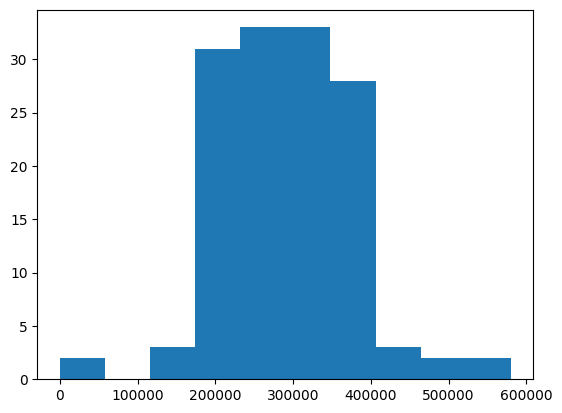

In [128]:
# TODO: Code
import matplotlib.pyplot as plt
df_histograma = df[df['level5'] == 'Arroyomolinos (Madrid)']
plt.hist(df_histograma["price"])

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [124]:
# TODO
valdemorillomean = ds[ds['level5'] == "Valdemorillo"].groupby('level5')['price'].mean()
galapagarmean = ds[ds['level5'] == "Galapagar"].groupby('level5')['price'].mean()

print(f"Precio promedio de{valdemorillomean  , galapagarmean} \n \n Las casas de Valdemorillo son en promedio 1.05% más caras \n Valdemorillo/Galapagar = 363860/360063 = 1.05%")


Precio promedio de(level5
Valdemorillo    363860.293103
Name: price, dtype: float64, level5
Galapagar    360063.202381
Name: price, dtype: float64) 
 
 Las casas de Valdemorillo son en promedio 1.05% más caras 
 Valdemorillo/Galapagar = 363860/360063 = 1.05%


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

¿A partir de surface?

In [ ]:
# TODO

#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

In [ ]:
# TODO: Código

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [93]:
# TODO
# TODO
num_clases_realEstate_name = ds['realEstate_name'].nunique()
print(f" {num_clases_realEstate_name}")


 1821


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [ ]:
# TODO

#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [ ]:
# TODO

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

In [ ]:
# TODO: Code

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [ ]:
# TODO

#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [ ]:
# TODO

#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

In [ ]:
# TODO

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [ ]:
# TODO

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

In [ ]:
# TODO

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [ ]:
from ipyleaflet import Map, basemaps

# Mapa centrado en Madrid
map = Map(center = (40.35, -3.8), zoom = 11.5, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [ ]:
## Aquí: traza la coordenadas de los estados

## PON TU CÓDIGO AQUÍ:
